In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scipy.stats import ttest_ind, ttest_1samp
import warnings
warnings.filterwarnings('ignore')

#set precision for displaying float-point values in the notebook
pd.options.display.float_format = '{:,.3f}'.format

#set figure dpi to 100 to get reasonably sized figures displayed in the notebook
plt.rc('figure', dpi=100)

#set savefig dpi to 300 to get high-quality images to insert in the paper
plt.rc('savefig', dpi=300)

#set to 'pdf' or 'eps' for vector figures or to 'png'
plt.rc('savefig', format='png')

# despine plots by default
plt.rc("axes.spines", top=False, right=False)

#set font sizes for figures throughout
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=20, titlesize=22)
plt.rc('legend', fontsize=16)

# color palette for sequential data
palette_sqn = 'viridis_r'

# color palette for participant IDs
palette_subj = 'magma_r'

In [2]:
import data_reader, data_analyser, trajectory_plotter
dr = data_reader.DataReader()

index = ['subj_id', 'session_no', 'block_no', 'trial_no']

exp_1, exp_2 = 'exp_1', 'exp_2'
choices_1, dynamics_1, stim_viewing_1 = dr.get_data(path='../../data/HEM_%s/processed/' % (exp_1), stim_viewing=True)
choices_2, dynamics_2, stim_viewing_2 = dr.get_data(path='../../data/HEM_%s/processed/' % (exp_2), stim_viewing=True)

# for initiation time analysis, we exclude trials with IT > 1.5 sec
choices_1 = choices_1[(choices_1.mouse_IT<1.5) & (choices_1.eye_IT<1.5)]
choices_2 = choices_2[(choices_2.mouse_IT<1.5) & (choices_2.eye_IT<1.5)]

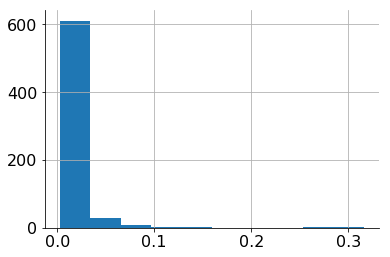

In [4]:
choices_1[choices_1.dwell_cursor>0].dwell_cursor.hist()